<a href="https://colab.research.google.com/github/aditsijoshi/SureStart2021/blob/main/Day23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
import os

In [3]:
num_classes=5
img_rows,img_cols=48,48
batch_size=32

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
train_data_dir='/content/drive/MyDrive/fer2013/train'
validation_data_dir='/content/drive/MyDrive/fer2013/validation'

In [7]:
#expand the size of our training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    width_shift_range=0.4,
    height_shift_range=0.4,
    horizontal_flip=True,
    fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

In [8]:

train_generator = train_datagen.flow_from_directory(
 train_data_dir,
 color_mode='grayscale',
 target_size=(img_rows,img_cols),
 batch_size=batch_size,
 class_mode='categorical',
 shuffle=True)
validation_generator = validation_datagen.flow_from_directory(
 validation_data_dir,
 color_mode='grayscale',
 target_size=(img_rows,img_cols),
 batch_size=batch_size,
 class_mode='categorical',
 shuffle=True)

Found 24256 images belonging to 5 classes.
Found 3006 images belonging to 5 classes.


In [10]:
model = Sequential()

In [11]:
#Block-1
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',
                 input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',
                 input_shape=(img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Block-2
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Block-3
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Block-4
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
#Block-5
model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#Block-6
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
#Block-7
model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

In [12]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)       

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
checkpoint = ModelCheckpoint('EmotionDetectionModel.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)
earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)
callbacks = [earlystop,checkpoint,reduce_lr]

In [13]:
# training the model was taking a long time, so decided to use the loaded model for 
# next steps
#model.compile(loss='categorical_crossentropy',
 #optimizer = Adam(lr=0.001),
 #metrics=['accuracy'])
#nb_train_samples = 24176
#nb_validation_samples = 3006
#epochs=15

#history=model.fit(
 #x=train_generator,
 #steps_per_epoch=nb_train_samples//batch_size,
 #epochs=epochs,
 #callbacks=callbacks,
 #validation_data=validation_generator,
 #validation_steps=nb_validation_samples//batch_size)

In [14]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [16]:
face_classifier=cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
classifier = load_model('/content/EmotionDetectionModel.h5')

In [19]:
class_labels=['Angry','Happy','Neutral','Sad','Surprise']
cap=cv2.VideoCapture(0)

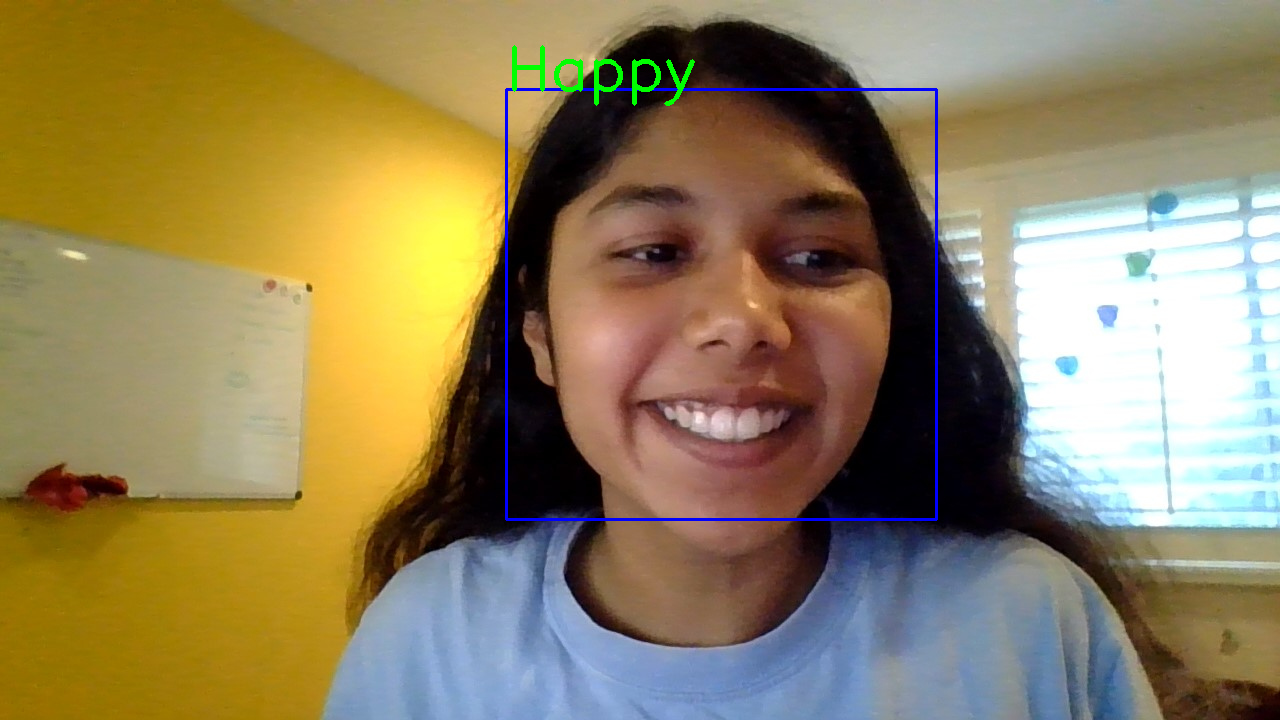

In [20]:
frame = cv2.imread('/content/happy.jpg') 
labels=[]
gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces=face_classifier.detectMultiScale(gray,1.3,5)

for (x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

    if np.sum([roi_gray])!=0:
        roi=roi_gray.astype('float')/255.0
        roi=img_to_array(roi)
        roi=np.expand_dims(roi,axis=0)

        preds=classifier.predict(roi)[0]
        label=class_labels[preds.argmax()]
        label_position=(x,y)
        cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    else:
        cv2.putText(frame,'No Face Found',(20,20),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)

cv2_imshow(frame)

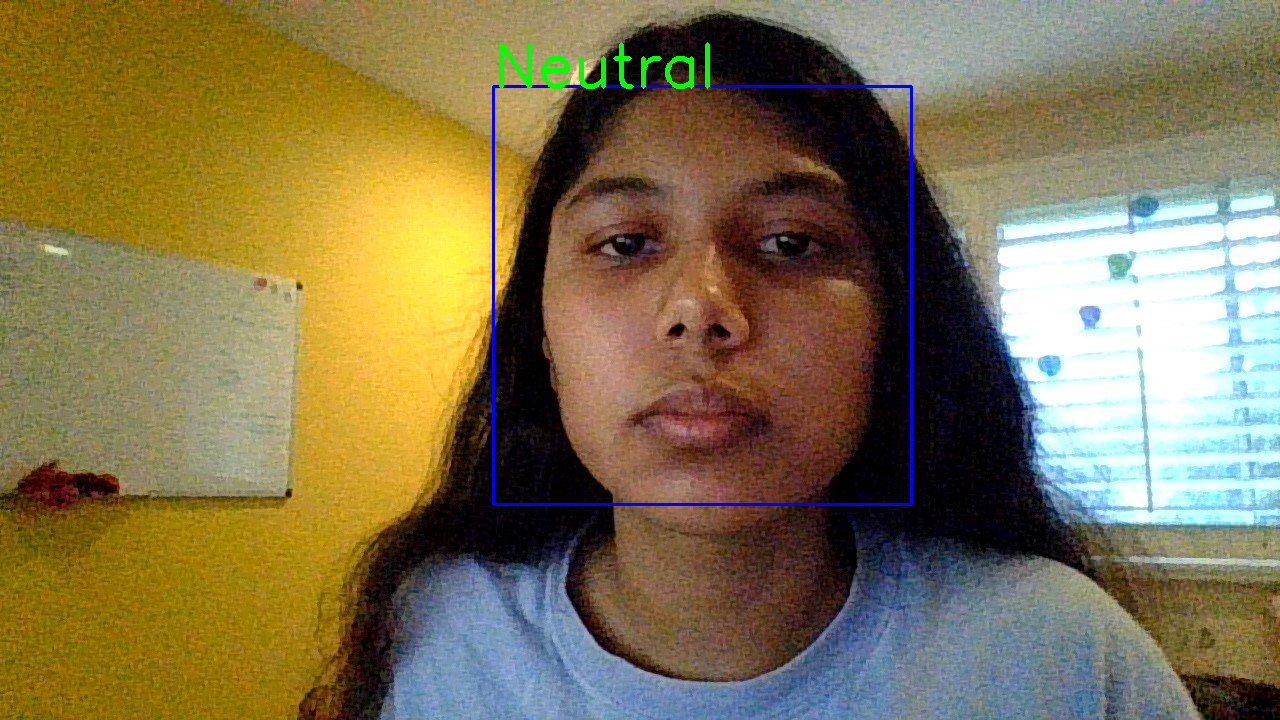

In [21]:
frame = cv2.imread('/content/neutral.jpg') 
labels=[]
gray=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
faces=face_classifier.detectMultiScale(gray,1.3,5)

for (x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_gray=cv2.resize(roi_gray,(48,48),interpolation=cv2.INTER_AREA)

    if np.sum([roi_gray])!=0:
        roi=roi_gray.astype('float')/255.0
        roi=img_to_array(roi)
        roi=np.expand_dims(roi,axis=0)

        preds=classifier.predict(roi)[0]
        label=class_labels[preds.argmax()]
        label_position=(x,y)
        cv2.putText(frame,label,label_position,cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)
    else:
        cv2.putText(frame,'No Face Found',(20,20),cv2.FONT_HERSHEY_SIMPLEX,2,(0,255,0),3)

cv2_imshow(frame)